In [1]:
#G THANMAI
#BL.EN.U4CSE21054
#LINEAR REGRESSION MONDAY

In [4]:
import pandas as pd
import numpy as np
df = pd.read_excel('embeddingsdata.xlsx')
df

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767,Label
0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,-0.017189,...,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309,0
1,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,-0.027138,...,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062,0
2,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,-0.029205,...,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289,0
3,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,-0.025772,...,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540,0
4,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,-0.015004,...,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.019743,-0.071799,0.022546,0.049042,-0.005767,-0.016275,-0.037731,0.029718,0.009203,-0.030913,...,-0.001192,-0.026138,-0.056447,0.015818,0.045241,0.012620,-0.004837,-0.014540,-0.046791,2
896,0.000186,-0.027604,0.010623,0.038237,-0.026675,0.020215,-0.040816,0.032210,0.041016,-0.014836,...,0.015479,-0.003967,-0.037808,0.021234,0.031012,-0.010890,0.003081,-0.015145,-0.045444,0
897,0.018066,-0.032152,0.039794,0.047608,0.003898,0.024092,-0.056508,0.020527,0.031972,-0.026038,...,0.011308,-0.016882,-0.059904,0.009558,0.039976,0.029574,0.013737,-0.003724,-0.017324,2
898,-0.003492,-0.022739,0.021777,0.044054,-0.005621,0.013863,-0.079196,0.039150,0.004557,-0.015787,...,0.004005,-0.007196,-0.041652,0.020945,0.047604,0.019767,0.005806,-0.019280,-0.016415,5


<AxesSubplot:xlabel='embed_10', ylabel='embed_759'>

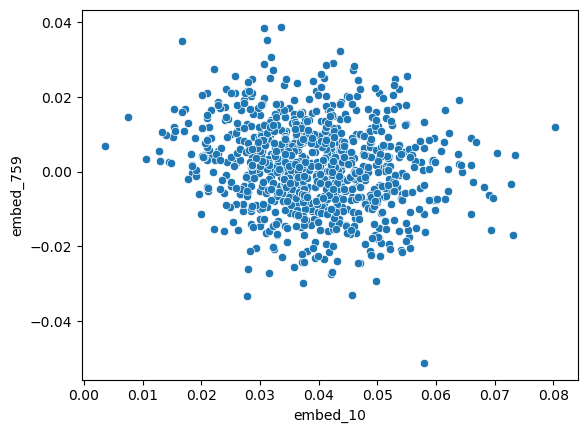

In [10]:
#Scatter plot
import seaborn as sns
sns.scatterplot(data = df,x='embed_10',y='embed_759')

In [42]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
x = df.iloc[:,:768]
y = df.iloc[:,768]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [39]:
#Linear Regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model_linreg = linear_model.LinearRegression()
model_linreg.fit(x_train,y_train)
y_pred = model_linreg.predict(x_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

Mean squared error: 3317938853084069888000.00


In [51]:
x = df[(df['Label'] == 0) | (df['Label'] == 1)].iloc[:, 0:768]
y = df[(df['Label'] == 0) | (df['Label'] == 1)].iloc[:, 768]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [41]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_logreg = LogisticRegression(random_state = 0)
model_logreg.fit(x_train,y_train)
y_pred = model_logreg.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy of Logistic Regression model is: {accuracy} ")

Accuracy of Logistic Regression model is: 0.8159203980099502 


In [49]:
#Regression Tree
from sklearn.tree import DecisionTreeRegressor
model_regrtree = DecisionTreeRegressor(max_depth = 5)
model_regrtree.fit(x_train,y_train)
y_pred = model_regrtree.predict(x_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

Mean squared error: 0.21


In [57]:
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors = 5)
model_knn.fit(x_train,y_train)
y_pred = model_knn.predict(x_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

Mean squared error: 0.13
